In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
%matplotlib inline

### MSCI World

The MSCI World is a market cap weighted stock market index of 1,644[1] stocks from companies throughout the world. 

### Create dataframe (MSCI)

In [2]:
msci_df = pd.read_csv('CHRIS-EUREX_FMWO1.csv')
msci_df.head(2)

,Date,Open,High,Low,Settle,Volume,Prev. Day Open Interest
0,2020-02-21,7093.0,7093.0,7041.0,7066.0,2666.0,112468.0
1,2020-02-20,7141.0,7146.0,7057.0,7093.0,4243.0,112315.0


In [3]:
def clean_columns(df):
    snake_and_clean_columns = []
    for col in df.columns:
        col = col.replace(' ', '')
        col = col.replace('.', '')
        snake_and_clean_columns.append(re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower())
    df.columns = snake_and_clean_columns
    return df

In [4]:
msci_df = clean_columns(msci_df)
msci_df.head(2)    

,date,open,high,low,settle,volume,prev_day_open_interest
0,2020-02-21,7093.0,7093.0,7041.0,7066.0,2666.0,112468.0
1,2020-02-20,7141.0,7146.0,7057.0,7093.0,4243.0,112315.0


In [5]:
msci_df['date'] = pd.to_datetime(msci_df['date']) 
msci_df = msci_df.sort_values('date', ascending=True) 
msci_df.tail(2)

,date,open,high,low,settle,volume,prev_day_open_interest
1,2020-02-20,7141.0,7146.0,7057.0,7093.0,4243.0,112315.0
0,2020-02-21,7093.0,7093.0,7041.0,7066.0,2666.0,112468.0


### PMI  Index (Purchasing Managers Index)

The Purchasing Managers Index (PMI) is a measure of the prevailing direction of economic trends in manufacturing.

### Create dataframe (PMI)

In [6]:
pmi_df = pd.read_csv('ISM-MAN_PMI.csv')
pmi_df.head(2)

,Date,PMI
0,2020-01-01,50.9
1,2019-12-01,47.8


In [7]:
pmi_df.columns = ['date', 'pmi']
pmi_df['date'] = pd.to_datetime(pmi_df['date']) 
pmi_df = pmi_df.sort_values('date', ascending=True) 
pmi_df.tail(2)

,date,pmi
1,2019-12-01,47.8
0,2020-01-01,50.9


### HSI Indes (Hang Seng Index)

The Hang Seng Index is a free-float capitalization-weighted index of a selection of companies from the Stock Exchange of Hong Kong.

### Create dataframe (^HSI)

In [8]:
hsi_df = pd.read_csv('^HSI.csv')
hsi_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0
1,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0
3,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0
4,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0


In [9]:
hsi_df = clean_columns(hsi_df)
hsi_df.head(2)   

,date,open,high,low,close,adj_close,volume
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0
1,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
hsi_df['date'] = pd.to_datetime(hsi_df['date']) 
hsi_df = hsi_df.dropna(thresh=3)
hsi_df = hsi_df.sort_values('date', ascending=True) 
hsi_df.head(2)

,date,open,high,low,close,adj_close,volume
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0
2,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0


### Checking the minimum and maximum ranges of dates

In [27]:
print('MSCI: ', np.min(msci_df['date'] ),np.max(msci_df['date'] ))
print('PMI: ', np.min(pmi_df['date'] ),np.max(pmi_df['date'] ))
print('^HSI: ', np.min(hsi_df['date'] ),np.max(hsi_df['date'] ))

MSCI:  2013-09-09 00:00:00 2020-02-21 00:00:00
PMI:  1948-01-01 00:00:00 2020-01-01 00:00:00
^HSI:  1986-12-31 00:00:00 2020-02-21 00:00:00


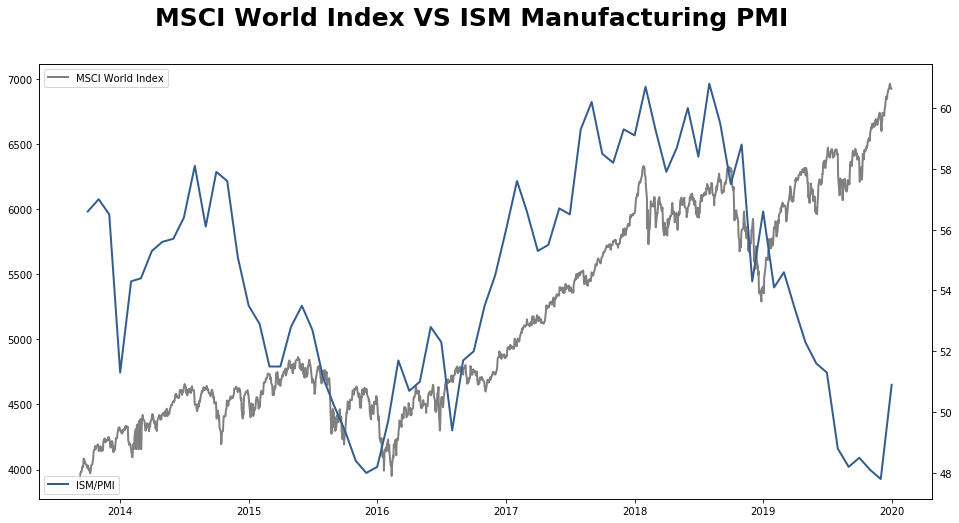

In [12]:
start_date = "2013-09-09"
end_date = "2020-01-01"

msci_df_tmp = msci_df.copy()
pmi_df_tmp = pmi_df.copy()

msci_df_tmp = msci_df_tmp[(msci_df_tmp['date'] >= start_date) & (msci_df_tmp['date'] <= end_date)]
pmi_df_tmp = pmi_df_tmp[(pmi_df_tmp['date'] >= start_date) & (pmi_df_tmp['date'] <= end_date)]


fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(msci_df_tmp['date'], 
         msci_df_tmp['settle'],
         color='gray', 
         linewidth=2,
         label='MSCI World Index')
plt.legend(loc='upper left')
fig.suptitle('MSCI World Index VS ISM Manufacturing PMI', fontsize=25, fontweight='bold')

ax.twinx()
plt.plot(pmi_df_tmp['date'],  pmi_df_tmp['pmi'] , 
         color='#345d8f', 
         linewidth=2,
         label='ISM/PMI')
plt.legend(loc='lower left') 

### Add rolling mean to MSCI

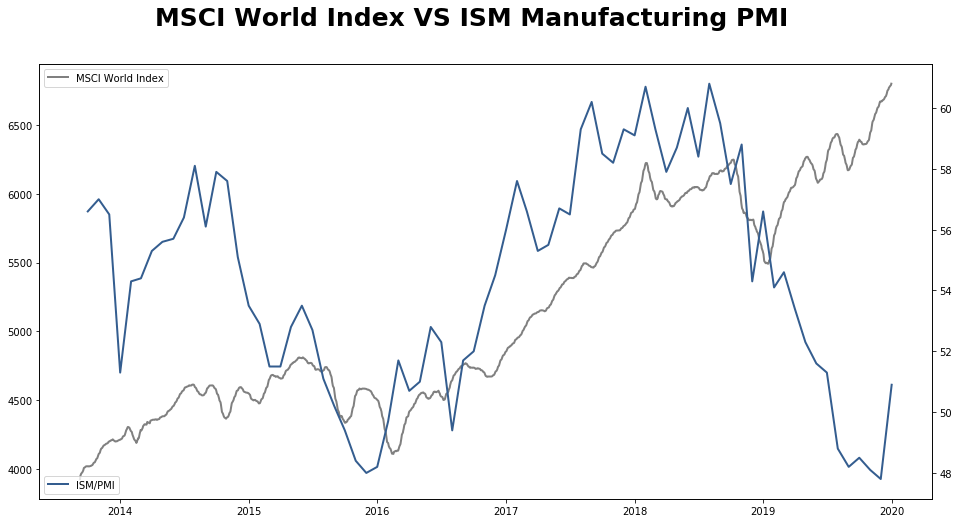

In [13]:
start_date = "2013-09-09"
end_date = "2020-01-01"

msci_df_tmp = msci_df.copy()
pmi_df_tmp = pmi_df.copy()

msci_df_tmp = msci_df_tmp[(msci_df_tmp['date'] >= start_date) & (msci_df_tmp['date'] <= end_date)]
pmi_df_tmp = pmi_df_tmp[(pmi_df_tmp['date'] >= start_date) & (pmi_df_tmp['date'] <= end_date)]


fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(msci_df_tmp['date'], 
         msci_df_tmp['settle'].rolling(window=20, min_periods=1).mean(), 
         color='gray', 
         linewidth=2,
         label='MSCI World Index')
plt.legend(loc='upper left')
fig.suptitle('MSCI World Index VS ISM Manufacturing PMI', fontsize=25, fontweight='bold')

ax.twinx()
plt.plot(pmi_df_tmp['date'],  pmi_df_tmp['pmi'] , 
         color='#345d8f', 
         linewidth=2,
         label='ISM/PMI')
plt.legend(loc='lower left') 

In [14]:
start_date = "2013-09-09"
end_date = "2020-01-01"

msci_df_tmp = msci_df[['date', 'settle']]
msci_df_tmp.columns = ['date', 'msci_settle']

pmi_df_tmp

merged_df = pd.merge(msci_df_tmp, 
                     pmi_df_tmp, 
                     on=['date'], 
                     how='left')

merged_df = merged_df.fillna(method='ffill')
merged_df = merged_df.dropna(axis=0)
merged_df.head()

,date,msci_settle,pmi
16,2013-10-01,4033.0,56.6
17,2013-10-02,4018.0,56.6
18,2013-10-03,4001.0,56.6
19,2013-10-04,4008.0,56.6
20,2013-10-08,3970.0,56.6


### Plot for percentage variability

In [17]:
merged_df['msci_settle_pct'] = merged_df['msci_settle'].pct_change()
merged_df['pmi_pct'] = merged_df['pmi'].pct_change()

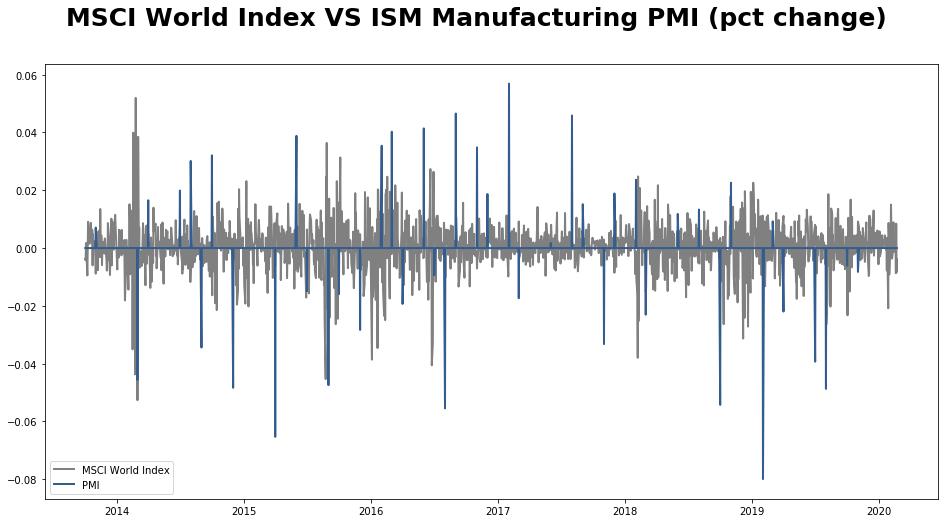

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(merged_df['date'], 
         merged_df['msci_settle_pct'], 
         color='gray', 
         linewidth=2,
         label='MSCI World Index')
fig.suptitle('MSCI World Index VS ISM Manufacturing PMI (pct change)', fontsize=25, fontweight='bold')

 
plt.plot(merged_df['date'],  
         merged_df['pmi_pct'],
         color='#345d8f', 
         linewidth=2,
         label='PMI')
plt.legend(loc='lower left') 

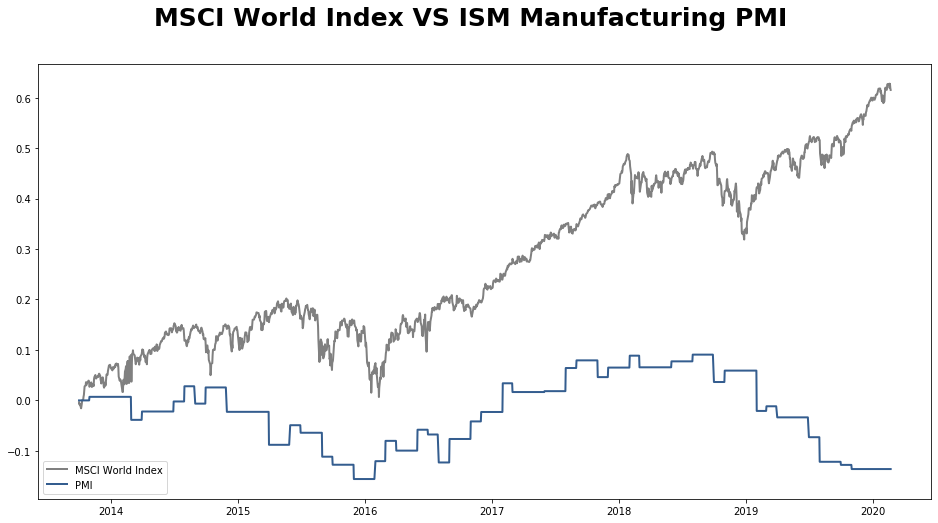

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(merged_df['date'], 
         merged_df['msci_settle_pct'].cumsum(),
         color='gray', 
         linewidth=2,
         label='MSCI World Index')
fig.suptitle('MSCI World Index VS ISM Manufacturing PMI', fontsize=25, fontweight='bold')

 
plt.plot(merged_df['date'],  
         merged_df['pmi_pct'].cumsum(), 
         color='#345d8f', 
         linewidth=2,
         label='PMI')
plt.legend(loc='lower left') 

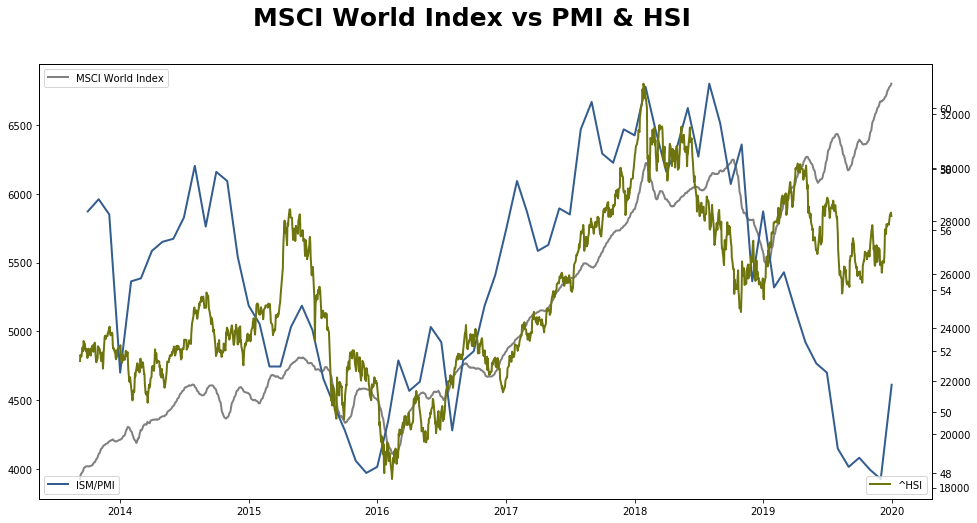

In [33]:
start_date = "2013-09-09"
end_date = "2020-01-01"

msci_df_tmp = msci_df.copy()
pmi_df_tmp = pmi_df.copy()
hsi_df_tmp = hsi_df.copy()

msci_df_tmp = msci_df_tmp[(msci_df_tmp['date'] >= start_date) & (msci_df_tmp['date'] <= end_date)]
pmi_df_tmp = pmi_df_tmp[(pmi_df_tmp['date'] >= start_date) & (pmi_df_tmp['date'] <= end_date)]
hsi_df_tmp = hsi_df_tmp[(hsi_df_tmp['date'] >= start_date) & (hsi_df_tmp['date'] <= end_date)]


fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(msci_df_tmp['date'], 
         msci_df_tmp['settle'].rolling(window=20, min_periods=1).mean(), 
         color='gray', 
         linewidth=2,
         label='MSCI World Index')
plt.legend(loc='upper left')
fig.suptitle('MSCI World Index vs PMI & HSI', fontsize=25, fontweight='bold')

ax.twinx()
plt.plot(pmi_df_tmp['date'],  pmi_df_tmp['pmi'] , 
         color='#345d8f', 
         linewidth=2,
         label='ISM/PMI')
plt.legend(loc='lower left') 
ax.twinx()
plt.plot(hsi_df_tmp['date'],  hsi_df_tmp['adj_close'] , 
         color='xkcd:olive', 
         linewidth=2,
         label='^HSI')

plt.legend(loc='lower right') 